In [2]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
from sklearn.model_selection import train_test_split
print("import done")

import done


In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

2022-08-10 16:00:24.746457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


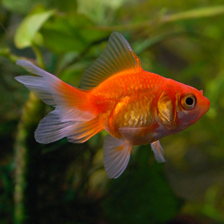

In [4]:
gold_fish = Image.open("goldfish.png").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 4s 4s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:

file_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [10]:

image_labels = []
with open(file_path, "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

LOAD FLOWERS DATASET

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [13]:
data_dir

'./datasets/flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

3670


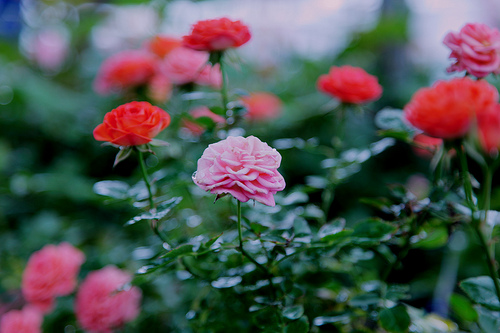

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
roses = list(data_dir.glob('roses/*'))
roses[:5]
Image.open(str(roses[1]))

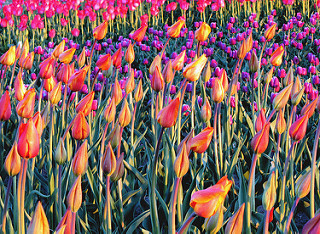

In [17]:

tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

Read flowers iages from disk into numpy array using opencv

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [19]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [21]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [24]:
# train_test_split is from Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make predictions using pre-trained Model on new dataset (We expect a mismatch between images and predictions)

In [26]:
X[0].shape

(224, 224, 3)

In [27]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [28]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

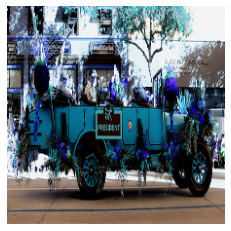

In [29]:
plt.axis('off')
plt.imshow(X[0])

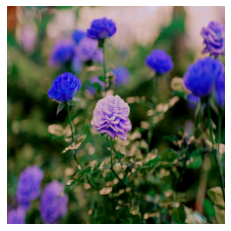

In [30]:
plt.axis('off')
plt.imshow(X[1])

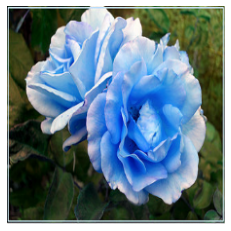

In [31]:
plt.axis('off')
plt.imshow(X[2])

In [32]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted


1/1 [==============================] - 1s 1s/step


array([795, 795, 722])

In [33]:
### Using the new images with the old CNN we get non-sense  
image_labels[795]

'shower curtain'

Take pre-trained model and retrain it using flower images

In [34]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
## The "top layer" refers to the very last layer that makes the prediction
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=IMAGE_SHAPE+(3,), trainable=False)
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, ##Not trainable
  tf.keras.layers.Dense(num_of_flowers) ##The output layer, will return one of 5 value for each of the flower types
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
## Retrain
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])



86/86 [==============================] - 96s 1s/step - loss: 0.8304 - acc: 0.6900


In [38]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 30s 1s/step - loss: 0.4222 - acc: 0.8508


[0.42221733927726746, 0.8507625460624695]